# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [1]:
%matplotlib inline
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ads block add-ons (YouBlock) in Chrome. Otherwise window.open() coomand doesn't work. Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [2]:
# cercare teddy bear
# Ctrl Shift J

# urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
# window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

### Create directory and upload urls file into your server and download images

Upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](images/download_images/upload.png)

Choose an appropriate name for your labeled images. 

In [2]:
classes = ['black', 'teddy', 'grizzly']

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [3]:
path = Path('data/bears')
path.mkdir(parents=True, exist_ok=True)

In [4]:
for cls in classes:
    folder = cls
    file = f'{cls}.txt'
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)
    # If you have problems download, try with `max_workers=0` to see exceptions:
    #download_images(path/file, dest, max_pics=20, max_workers=0)

# occhio a sintassi f''

Error https://www.washingtonpost.com/resizer/vn6pmHdQPxRzwhhFkpSEsmUp9Qc=/534x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XK6YBT5GSE2LROLN3FO4WRK5JI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://wildlife.utah.gov/guidebooks/images/bear_cover.jpg HTTPSConnectionPool(host='wildlife.utah.gov', port=443): Max retries exceeded with url: /guidebooks/images/bear_cover.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f7f9a78e518>, 'Connection to wildlife.utah.gov timed out. (connect timeout=4)'))


Error https://www.sendah.com/988-large_default/daydream-white-teddy-bear.jpg HTTPSConnectionPool(host='www.sendah.com', port=443): Max retries exceeded with url: /988-large_default/daydream-white-teddy-bear.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')],)",),))
Error https://www.offercart.in/wp-content/uploads/2018/06/soft-lovable-hugable-cute-teddy-bear-pink-best-for-someone-original-imaf2q37hycmukpy-600x642.jpeg HTTPSConnectionPool(host='www.offercart.in', port=443): Max retries exceeded with url: /wp-content/uploads/2018/06/soft-lovable-hugable-cute-teddy-bear-pink-best-for-someone-original-imaf2q37hycmukpy-600x642.jpeg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f7f99723668>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))


In [5]:
path.ls()

[PosixPath('data/bears/black'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/teddy'),
 PosixPath('data/bears/teddy.txt'),
 PosixPath('data/bears/grizzly.txt'),
 PosixPath('data/bears/cleaned.csv'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/export.pkl'),
 PosixPath('data/bears/black.txt')]

Then we can remove any images that can't be opened:

In [6]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

black


cannot identify image file <_io.BufferedReader name='data/bears/black/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000075.jpg'>


/home/andrea/anaconda3/envs/dss/lib/python3.6/site-packages/PIL/Image.py:1022: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


cannot identify image file <_io.BufferedReader name='data/bears/black/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000051.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000026.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000005.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000073.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000078.jpg'>
teddy


cannot identify image file <_io.BufferedReader name='data/bears/teddy/00000025.png'>
cannot identify image file <_io.BufferedReader name='data/bears/teddy/00000066.jpg'>
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000097.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000017.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000043.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000067.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000073.jpg'>


## View data

In [7]:
np.random.seed(42)

import torch
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [8]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# non ho dir train e valid

In [9]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [10]:
data.classes

['black', 'grizzly', 'teddy']

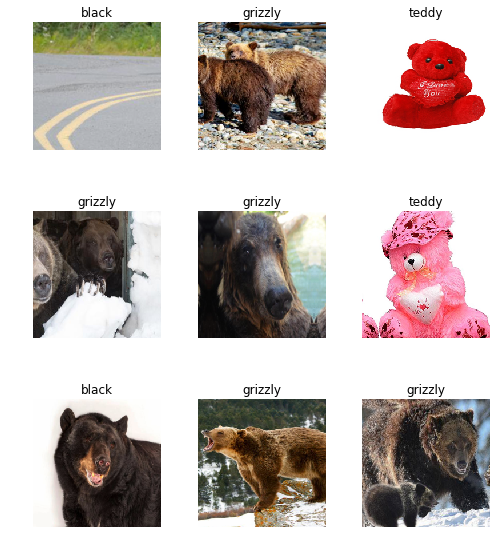

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddy'], 3, 219, 54)

## Train model

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.377061,0.409470,0.129630,00:03
1,0.799374,0.200928,0.055556,00:02
2,0.543450,0.209186,0.055556,00:02
3,0.407555,0.207330,0.074074,00:02


In [15]:
learn.save('stage-1')

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


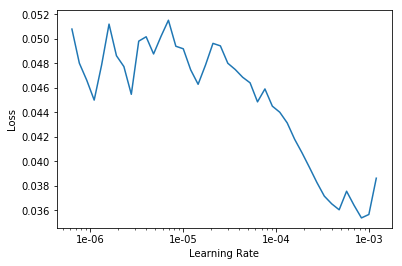

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.058617,0.260572,0.055556,00:02
1,0.057953,0.275051,0.074074,00:02


In [20]:
learn.save('stage-2')

## Interpretation

In [21]:
learn.load('stage-2');

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

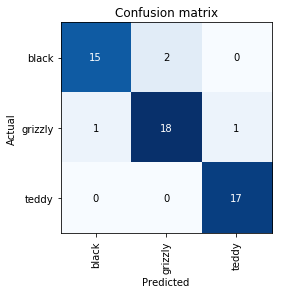

In [23]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [24]:
# importanza di human in the loop

In [25]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [26]:
db = (ImageList.from_folder(path)
                   .no_split()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

/home/andrea/anaconda3/envs/dss/lib/python3.6/site-packages/fastai/data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [27]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [28]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [29]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [30]:
# non funziona ancora in Jupyter Lab (/lab) va utilizzato Jupyter Notebook (/tree)

ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, loosing all the results from cleaning the data from toplosses.

In [31]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [32]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [33]:
# molto più semplice di quanto mostrato in lezione 2

learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [34]:
defaults.device = torch.device('cpu')

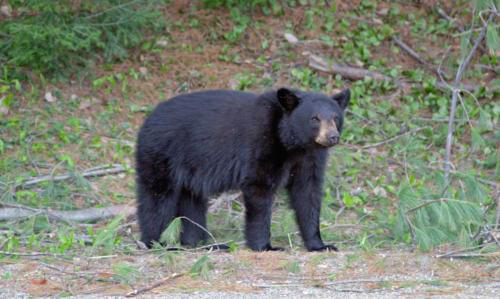

In [35]:
img = open_image(path/'black'/'00000020.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [36]:
learn = load_learner(path)

In [37]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

In [38]:
print(pred_class)
print(pred_idx)
print(outputs)

black
tensor(0)
tensor([9.9886e-01, 1.1302e-03, 5.2100e-06])


So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [39]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [40]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,3.979145,37768412.000000,0.629630,00:02


### Learning rate (LR) too low

In [41]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [42]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.419649,1.414043,0.666667,00:02
1,1.403222,1.316873,0.629630,00:02
2,1.416604,1.270471,0.648148,00:02
3,1.436173,1.233131,0.629630,00:02
4,1.418674,1.195403,0.685185,00:02


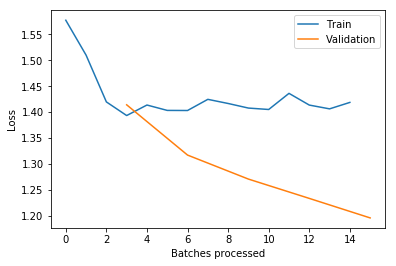

In [43]:
learn.recorder.plot_losses()

# fra l'altro train loss > validation loss (vanno considerate uguali)
# esempio dropout???

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [44]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [45]:
learn.fit_one_cycle(1)

# in lezione 2 training loss >> valid loss (non considerabili uguali) perchè validation ha 'guadagno' del primo ciclo

epoch,train_loss,valid_loss,error_rate,time
0,1.570344,10.215961,0.685185,00:02


### Too many epochs

In [49]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=16, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [50]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [51]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

# overfitting
# concetti diverso di overfitting: 
    # - mischiare rumore a segnale (per questo accuracy train migliore di accuracy valid)
    # - trainare (fit) oltre il punto di best accuracy valid 

epoch,train_loss,valid_loss,error_rate,time
0,1.120133,1.153520,0.661224,00:04
1,1.095538,1.143442,0.657143,00:01
2,1.118693,1.127541,0.628571,00:01
3,1.063481,1.089391,0.604082,00:01
4,1.046757,1.046520,0.583673,00:01
5,0.994933,0.991724,0.526531,00:01
6,0.929197,0.933243,0.461224,00:01
7,0.874491,0.857987,0.375510,00:01
8,0.833795,0.780579,0.289796,00:01
9,0.776491,0.697988,0.236735,00:01


In [52]:
# immagine è matrice di numeri (2 o 3 dimensioni)
# nn implementa funzione che trasforma matrice in 3 probabilità (a somma 1.0): una per ogni classe
# max e argmax

In [53]:
learn.predict??

Signature: learn.predict(item:fastai.core.ItemBase, **kwargs)
Source:   
    def predict(self, item:ItemBase, **kwargs):
        "Return predicted class, label and probabilities for `item`."
        batch = self.data.one_item(item)
        res = self.pred_batch(batch=batch)
        pred,x = grab_idx(res,0),batch[0]
        norm = getattr(self.data,'norm',False)
        if norm:
            x = self.data.denorm(x)
            if norm.keywords.get('do_y',False): pred = self.data.denorm(pred)
        ds = self.data.single_ds
        pred = ds.y.analyze_pred(pred, **kwargs)
        out = ds.y.reconstruct(pred, ds.x.reconstruct(item.data)) if has_arg(ds.y.reconstruct, 'x') else ds.y.reconstruct(pred)
        return out, pred, res[0]
File:      ~/anaconda3/envs/dss/lib/python3.6/site-packages/fastai/basic_train.py
Type:      method


In [54]:
# predict non è più in vision.learner (solo per immagini) ma generico modulo trasversale
# non c'è più argmax 

In [55]:
dir(learn.data.train_ds)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'c',
 'databunch',
 'export',
 'filter_by_func',
 'get_state',
 'item',
 'load_empty',
 'load_state',
 'new',
 'predict',
 'process',
 'set_item',
 'tfm_y',
 'tfmargs',
 'tfmargs_y',
 'tfms',
 'tfms_y',
 'to_csv',
 'to_df',
 'transform',
 'transform_y',
 'x',
 'y']

In [56]:
learn.data.train_ds.y.analyze_pred??

Signature: learn.data.train_ds.y.analyze_pred(pred, thresh:float=0.5)
Docstring: Called on `pred` before `reconstruct` for additional preprocessing.
Source:        def analyze_pred(self, pred, thresh:float=0.5): return pred.argmax()
File:      ~/anaconda3/envs/dss/lib/python3.6/site-packages/fastai/data_block.py
Type:      method


In [57]:
error_rate??

Signature: error_rate(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f8017a00510>
Source:   
def error_rate(input:Tensor, targs:Tensor)->Rank0Tensor:
    "1 - `accuracy`"
    return 1 - accuracy(input, targs)
File:      ~/anaconda3/envs/dss/lib/python3.6/site-packages/fastai/metrics.py
Type:      function


In [58]:
accuracy??

Signature: accuracy(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f8017a00510>
Source:   
def accuracy(input:Tensor, targs:Tensor)->Rank0Tensor:
    "Compute accuracy with `targs` when `input` is bs * n_classes."
    n = targs.shape[0]
    input = input.argmax(dim=-1).view(n,-1)
    targs = targs.view(n,-1)
    return (input==targs).float().mean()
File:      ~/anaconda3/envs/dss/lib/python3.6/site-packages/fastai/metrics.py
Type:      function


In [59]:
# metriche applicate a validation set (senza cross validation)
# lr 3e-3, poi unfreeze e lr slice(<lr find>, 3e-4)

In [60]:
# y = ax + b
# https://www.khanacademy.org/
# y = a1x1 + a2x2 (x2 = 1)
# n punti
# yi = a1xi1 + a2xi2 (xi2 = 1 per ogni i) (a1 e a2 non sono indicizzati su i)
# vettoriale v = Xa
# http://matrixmultiplication.xyz/

# problema pochi dati
# unbalanced data

# implementazione vettoriale vs loops